In [5]:
import pandas as pd
import os, shutil
import tensorflow as tf
import IPython.display as display
import numpy as np
import time
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, roc_curve, auc
from sklearn.metrics import plot_confusion_matrix, classification_report
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import RMSprop
# from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

In [6]:
datadir_train = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/train'
datadir_test = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/test'
datadir_validate = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/val'
categories = ['NORMAL', 'PNEUMONIA']

In [7]:
data_train = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_train, 
        target_size=(256, 256), 
        batch_size = 600, 
        seed = 123,
        class_mode="binary") 

Found 5216 images belonging to 2 classes.


In [8]:
data_test = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_test, 
        target_size=(256, 256), 
        batch_size = 624, 
        seed = 123,
        class_mode="binary")
#         shuffle = False) 

Found 624 images belonging to 2 classes.


In [9]:
data_val = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_validate, 
        target_size=(256, 256), 
        batch_size = 16, 
        seed = 12,
        class_mode="binary")
#         shuffle = False) 

Found 16 images belonging to 2 classes.


In [10]:
train_images, train_labels = next(data_train)
test_images, test_labels = next(data_test)
val_images, val_labels = next(data_val)

In [11]:
X_train = np.array(train_images)
y_train = np.array(train_labels)

X_test = np.array(test_images)
y_test = np.array(test_labels)

X_val = np.array(val_images)
y_val = np.array(val_labels)

In [35]:
# def fix_data(x, y):
#     x = x.astype('float32')
#     ds = tf.data.Dataset.from_tensor_slices((x,y))
#     ds = ds.shuffle(1000, reshuffle_each_iteration = True)
#     ds = ds.repeat()
#     ds = ds.batch(50, drop_remainder = True)
#     return ds

# fix_train = fix_data(train_images, train_labels)
# # fix
# print(fix_train)
# fix_val = fix_data(val_images, val_labels)
# print(fix_val)
# fix_test = fix_data(test_images, test_labels)

<BatchDataset shapes: ((50, 256, 256, 3), (50,)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((50, 256, 256, 3), (50,)), types: (tf.float32, tf.float32)>


In [13]:
cnn = Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn.add(layers.MaxPooling2D((2, 2),padding='same')) #padding added so edge pixels get included in convolution
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same')) #hidden layer
cnn.add(layers.MaxPooling2D((2, 2),padding='same')) #max pooling
cnn.add(layers.Flatten()) #flatten layer
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.007),
              metrics=['acc', 'Recall', 'Precision', 'AUC']) #compiling with gradient descent


history = cnn.fit(X_train,
                y_train,
                epochs=2,
                batch_size=50,
                validation_data=(X_val, y_val))

Epoch 1/2
12/12 [==============================] - 57s 5s/step - loss: 19.2758 - acc: 0.6977 - recall: 0.8883 - precision: 0.7578 - auc: 0.4785 - val_loss: 0.6801 - val_acc: 0.6250 - val_recall: 0.2500 - val_precision: 1.0000 - val_auc: 0.8047
Epoch 2/2
12/12 [==============================] - 47s 4s/step - loss: 0.6640 - acc: 0.7357 - recall: 0.8751 - precision: 0.8150 - auc: 0.6614 - val_loss: 0.6635 - val_acc: 0.6250 - val_recall: 0.3750 - val_precision: 0.7500 - val_auc: 0.7109


In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                4194336   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3

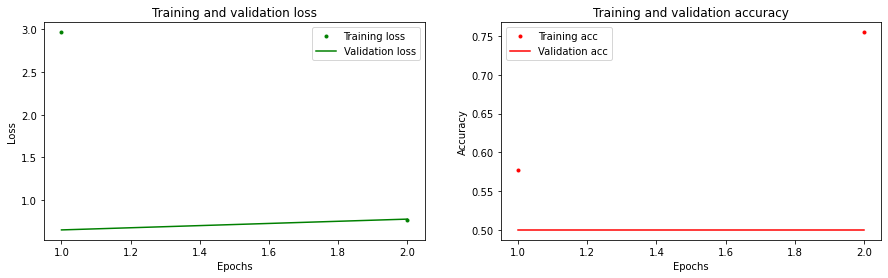

In [83]:
hist_cnn = history.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
results_train = cnn.evaluate(data_train)
results_test = cnn.evaluate(data_test)
print(results_train, results_test)

1/1 [==============================] - 20s 20s/step - loss: 0.6196 - acc: 0.6522 - recall: 0.6154 - precision: 0.7818 - auc: 0.7401
[0.6052399277687073, 0.6725460290908813, 0.5971612930297852, 0.9402681589126587, 0.8177225589752197] [0.6195960640907288, 0.6522436141967773, 0.6153846383094788, 0.7817589640617371, 0.7401161193847656]


In [16]:
#confusion matrix
pred = cnn.predict(X_test)
cm = confusion_matrix(y_test, pred.round())
cm

array([[167,  67],
       [150, 240]], dtype=int64)

<AxesSubplot:>

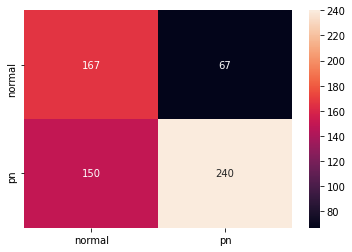

In [17]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g', xticklabels = ['normal', 'pn'], yticklabels = ['normal', 'pn'])

In [20]:
classification_report(y_test, pred.round())

'              precision    recall  f1-score   support\n\n         0.0       0.53      0.71      0.61       234\n         1.0       0.78      0.62      0.69       390\n\n    accuracy                           0.65       624\n   macro avg       0.65      0.66      0.65       624\nweighted avg       0.69      0.65      0.66       624\n'

In [34]:
print('True:', y_test[:624])

True: [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.

0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 
0 0 0 - 233 (167+67 ?)

In [1]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

NameError: name 'metrics' is not defined

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

NameError: name 'plt' is not defined

In [19]:
classification_report(y_test, pred.round())

'              precision    recall  f1-score   support\n\n         0.0       0.53      0.71      0.61       234\n         1.0       0.78      0.62      0.69       390\n\n    accuracy                           0.65       624\n   macro avg       0.65      0.66      0.65       624\nweighted avg       0.69      0.65      0.66       624\n'

In [ ]:
#two sample t-test
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
t, p_value = ttest_ind(waterfront['price'], no_water['price'], equal_var=True)
print(t)
print(p_value)